<a href="https://colab.research.google.com/github/hardiksharma6555/IIT-M/blob/main/OPE2V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving v4.csv to v4.csv


{'v4.csv': b'Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation\nlow,med,3,6,med,med,good\nlow,med,2,4,small,med,acc\nhigh,med,3,4,med,high,acc\nmed,low,4,4,big,high,vgood\nvhigh,med,3,6,big,high,acc\nlow,high,3,2,big,med,unacc\nhigh,high,4,4,small,med,unacc\nmed,med,4,4,med,low,unacc\nvhigh,low,2,2,small,high,unacc\nhigh,vhigh,4,2,small,low,unacc\nhigh,med,5,2,med,low,unacc\nmed,high,3,2,big,high,unacc\n,vhigh,5,6,small,med,unacc\nlow,high,4,6,big,high,vgood\nhigh,vhigh,3,2,med,med,unacc\nlow,high,4,4,small,med,acc\nlow,low,5,2,small,high,unacc\nmed,med,4,6,big,high,vgood\nvhigh,vhigh,3,6,small,high,unacc\nvhigh,low,2,6,small,med,unacc\nlow,vhigh,4,2,big,med,unacc\nlow,vhigh,5,6,big,low,unacc\nvhigh,vhigh,2,6,med,med,unacc\nmed,high,2,4,big,high,acc\nhigh,vhigh,2,6,small,high,unacc\nhigh,med,2,2,med,high,unacc\nvhigh,vhigh,4,2,big,med,unacc\nlow,low,4,4,big,high,vgood\nhigh,vhigh,5,6,big,high,unacc\nmed,med,3,6,big,med,acc\nlow,med,5,6,med,high,vgood\nlow,low,5,4,big,high,vgood\nlo

In [4]:
data = pd.read_csv('v4.csv')

In [5]:
data.shape

(1500, 7)

## Q2 [Marks: 2] Which of the columns in the dataset has null values?

In [6]:
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
0,low,med,3,6,med,med,good
1,low,med,2,4,small,med,acc
2,high,med,3,4,med,high,acc
3,med,low,4,4,big,high,vgood
4,vhigh,med,3,6,big,high,acc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1496 non-null   object
 1   Maint       1500 non-null   object
 2   Doors       1500 non-null   int64 
 3   Persons     1500 non-null   int64 
 4   Lug_boot    1500 non-null   object
 5   Safety      1500 non-null   object
 6   Evaluation  1500 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


## Q3 [Marks: 3] What are the unique Lug_boot values mentioned in the dataset?

In [8]:
data['Lug_boot'].unique()

array(['med', 'small', 'big'], dtype=object)

## Q4 [Marks: 3] Divide the dataset into X and y, where the column 'Evaluation' goes to y (labels) and the rest of the columns go to X (feature matrix). What is the distribution of unacc and acc classes in y ?

In [9]:
y = data.pop('Evaluation')
X = data
X.shape, y.shape

((1500, 6), (1500,))

In [10]:
y.value_counts()

unacc    1039
acc       344
good       59
vgood      58
Name: Evaluation, dtype: int64

## Q5 [Marks: 2] Apply SimpleImputer with strategy ='most_frequent' to transform X. What is the type of the transformed X?

In [11]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')
x_trans = si.fit_transform(X)
type(x_trans)

numpy.ndarray

## Q6[Marks: 4] If the X obtained in the previous question has any datatype other than DataFrame, convert it into DataFrame with columns being ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'].
## How many mising values are there in X now?

In [12]:
X_trans = pd.DataFrame(X, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'])

In [13]:
X_trans

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,low,med,3,6,med,med
1,low,med,2,4,small,med
2,high,med,3,4,med,high
3,med,low,4,4,big,high
4,vhigh,med,3,6,big,high
...,...,...,...,...,...,...
1495,high,med,4,6,big,low
1496,med,vhigh,2,6,med,high
1497,high,high,5,6,small,high
1498,high,med,3,6,big,high


In [14]:
X_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1496 non-null   object
 1   Maint     1500 non-null   object
 2   Doors     1500 non-null   int64 
 3   Persons   1500 non-null   int64 
 4   Lug_boot  1500 non-null   object
 5   Safety    1500 non-null   object
dtypes: int64(2), object(4)
memory usage: 70.4+ KB


## Q7.[Marks: 3] Apply OneHotEncoder on the categorical features ['Buying', 'Maint', 'Lug_boot', 'Safety'] with option (sparse = False) and StandardScaler on the numerical features ['Doors', 'Persons'] of X. Let's call the outputs of the first and second operations respectively to be X1 and X2.
## What are the data types of X1 and X2?


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(sparse = False)
ss = StandardScaler()
X1 = ohe.fit_transform(X_trans[['Buying','Maint', 'Lug_boot','Safety']])
X2 = ss.fit_transform(X_trans[['Doors','Persons']])

In [16]:
X1.shape,X2.shape

((1500, 15), (1500, 2))

In [17]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

# Q8

In [18]:
X = pd.DataFrame(np.hstack((X1, X2)))
# X = np.concatenate((X1, X2), axis=1).shape

In [20]:
X.shape

(1500, 17)

Q9

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 17), (300, 17), (1200,), (300,))

#Q10

In [21]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0=1, max_iter=10, shuffle=False, validation_fraction=0.2, penalty=None, alpha=0, fit_intercept=True, warm_start=False)
p.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(alpha=0, eta0=1, max_iter=10, shuffle=False, validation_fraction=0.2)

In [22]:
p.coef_[0][1]

-1.0

#Q11

In [23]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', alpha=0.001, learning_rate='constant', eta0=0.01, max_iter=10, random_state=32)
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.7975

## Q12

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

distributions = {'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}
lr = LogisticRegression(solver='saga', random_state=32, tol=0.01, max_iter=200)
rsc = RandomizedSearchCV(lr, param_distributions=distributions, random_state=32)
rsc.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=32,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                                        'penalty': ['l1', 'l2']},
                   random_state=32)

In [25]:
rsc.best_params_

{'penalty': 'l1', 'C': 3.5}

## Q13

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf'], 'C': [1,10]}
svc = SVC()
gsc = GridSearchCV(svc, param_grid=param_grid)
gsc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [29]:
gsc.best_params_

{'n_neighbors': 7}

## Q14

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,3,5,7]}
knc = KNeighborsClassifier(metric='minkowski', p=2)
gsc = GridSearchCV(knc, scoring='accuracy', param_grid=param_grid, cv=4)
gsc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [28]:
gsc.best_params_

{'n_neighbors': 7}

## Q15

In [30]:
gsc.best_score_

0.9166666666666667

## Q16

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=5, min_impurity_decrease=0.001, random_state=32)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001, min_samples_split=5,
                       random_state=32)

In [32]:
dtc.score(X_test, y_test)

0.9566666666666667

## Q17

In [33]:
dtc.get_depth()

11

## Q18

In [34]:
dtc.n_features_, dtc.n_classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


(17, 4)

[Text(0.7181818181818181, 0.9583333333333334, 'X[13] <= 0.5\ngini = 0.462\nsamples = 1200\nvalue = [283, 43, 831, 43]'),
 Text(0.7, 0.875, 'X[16] <= -0.617\ngini = 0.579\nsamples = 800\nvalue = [283, 43, 431, 43]'),
 Text(0.6818181818181818, 0.7916666666666666, 'gini = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.7181818181818181, 0.7916666666666666, 'X[8] <= 0.5\ngini = 0.612\nsamples = 537\nvalue = [283, 43, 168, 43]'),
 Text(0.5272727272727272, 0.7083333333333334, 'X[1] <= 0.5\ngini = 0.603\nsamples = 401\nvalue = [230, 43, 85, 43]'),
 Text(0.3, 0.625, 'X[11] <= 0.5\ngini = 0.53\nsamples = 306\nvalue = [192, 16, 81, 17]'),
 Text(0.16818181818181818, 0.5416666666666666, 'X[2] <= 0.5\ngini = 0.461\nsamples = 204\nvalue = [145, 10, 32, 17]'),
 Text(0.09090909090909091, 0.4583333333333333, 'X[5] <= 0.5\ngini = 0.339\nsamples = 134\nvalue = [105, 0, 29, 0]'),
 Text(0.05454545454545454, 0.375, 'X[15] <= -0.892\ngini = 0.123\nsamples = 91\nvalue = [85, 0, 6, 0]'),
 Text(0.03636363

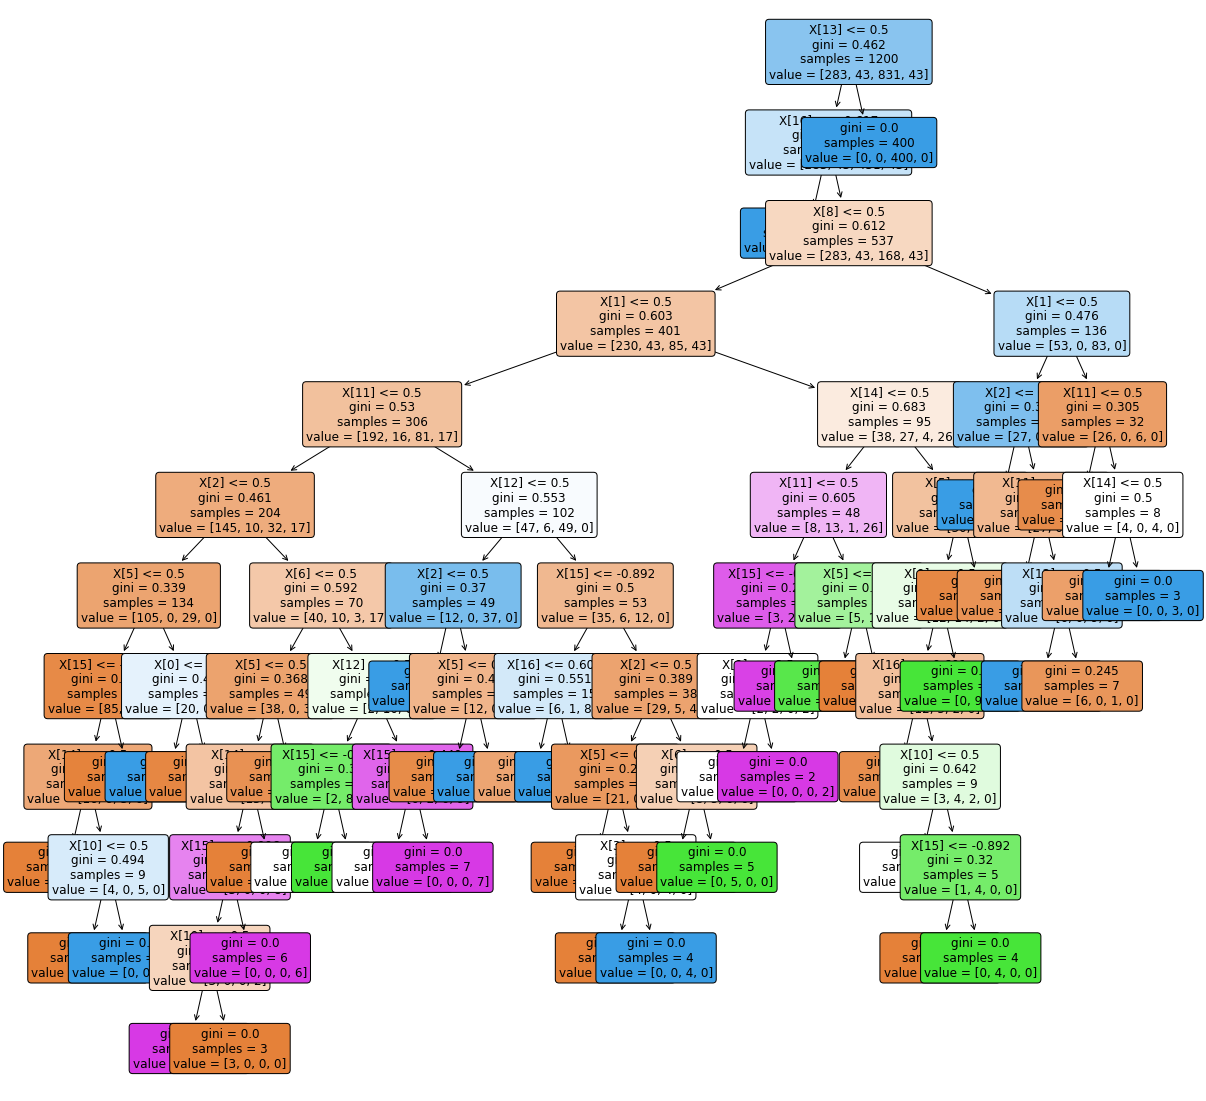

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

from sklearn.tree import plot_tree
plot_tree(dtc, filled=True, rounded=True, fontsize=12)

## Q19

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [10, 11, 12, 13, 14, 15]}
rfc = RandomForestClassifier(random_state=32)
gsc = GridSearchCV(rfc, param_grid=param_grid, return_train_score=True)
gsc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=32),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15]},
             return_train_score=True)

In [38]:
gsc.cv_results_['mean_train_score']

array([0.999375  , 0.99979167, 1.        , 1.        , 1.        ,
       1.        ])

In [39]:
best_index = gsc.cv_results_['mean_test_score'].argmax()

In [40]:
gsc.cv_results_['params'][best_index]

{'max_depth': 14}

##Q20

In [37]:
# support vector classifier (SVC), LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier.
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

B1 = BaggingClassifier(base_estimator=SVC(random_state=32), n_estimators=15, random_state=32)
B1.fit(X_train, y_train)
b1_score = B1.score(X_test, y_test)

B2 = BaggingClassifier(base_estimator=LogisticRegression(random_state=32), n_estimators=15, random_state=32)
B2.fit(X_train, y_train)
b2_score = B2.score(X_test, y_test)

B3 = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=15, random_state=32)
B3.fit(X_train, y_train)
b3_score = B3.score(X_test, y_test)

B4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=32), n_estimators=15, random_state=32)
B4.fit(X_train, y_train)
b4_score = B4.score(X_test, y_test)

print(b1_score, b2_score, b3_score, b4_score)

0.9533333333333334 0.81 0.9266666666666666 0.9733333333333334
